### The German Traffic Sign Benchmark

Student Name 1: Matteo Anelli

Student Name 2: José Manuel Pérez

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [0]:
!wget -c http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip
!unzip FullIJCNN2013.zip

--2019-04-06 11:53:19--  http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip
Resolving benchmark.ini.rub.de (benchmark.ini.rub.de)... 134.147.122.15
Connecting to benchmark.ini.rub.de (benchmark.ini.rub.de)|134.147.122.15|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  FullIJCNN2013.zip
replace FullIJCNN2013/00000.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [0]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213))

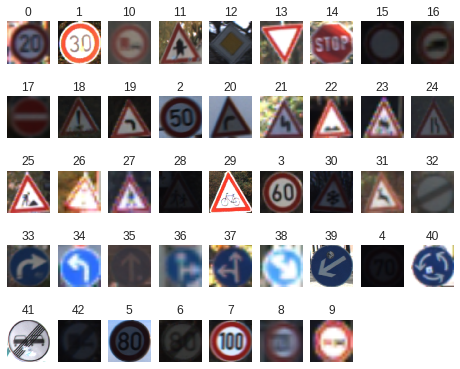

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600]
va_signs = np.array(train_signs)[600:852]
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

Using TensorFlow backend.


In [0]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

## Assignment 3.3: Transfer learning

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam

## Cannot load these modules
# from keras.applications.resnet50_v2 import ResNet50V2
# from keras.applications.resnext import ResNeXt50
#from keras.applications.resnet101 import ResNet101
#from keras.applications.resnet152 import ResNet152

## Base model
#baseline = ResNet50(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))

## Best Result until now
#baseline = DenseNet201(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))

## Nice Results
#baseline = DenseNet121(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))
#baseline = DenseNet169(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))

## Impossible to load, or to reach a good result.
#baseline = ResNet50V2(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))
#baseline = ResNeXt50(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))
#baseline = ResNet101(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))
#baseline = ResNet152(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))
#baseline = VGG16(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))
#baseline = VGG19(weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))

## Not tried
#baseline = NASNetLarge(include_top=False, input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3), weights='imagenet')
#baseline = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))
#baseline = Xception(include_top=False, weights='imagenet', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3))
#baseline = MobileNetV2(input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3), alpha=1.0, weights='imagenet')

predictions = Dense(num_classes, activation='softmax')(baseline.layers[-2].output)
resnet = Model(inputs=baseline.input, outputs=predictions)

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
resnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
resnet.summary()

ImportError: ignored

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, fill_mode='nearest')
datagen.fit(tr_signs, augment=True)

train_steps = int(len(tr_signs) / 16)
valid_steps = int(len(va_signs) / 16)
data = resnet.fit_generator(datagen.flow(tr_signs, tr_labels, batch_size=16), epochs=100, steps_per_epoch=train_steps, verbose=2, validation_data=(va_signs, va_labels), validation_steps=valid_steps, callbacks=[tensorboard])

start = time()
loss, acc = resnet.evaluate(te_signs, te_labels, verbose=0)
end = time()
print('ResNet50 took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Epoch 1/100
 - 33s - loss: 3.5061 - acc: 0.2314 - val_loss: 5.6693 - val_acc: 0.2738
Epoch 2/100
 - 24s - loss: 1.9116 - acc: 0.4814 - val_loss: 5.8423 - val_acc: 0.2937
Epoch 3/100
 - 23s - loss: 1.2717 - acc: 0.6283 - val_loss: 3.1108 - val_acc: 0.4841
Epoch 4/100
 - 23s - loss: 1.0142 - acc: 0.7331 - val_loss: 1.6170 - val_acc: 0.6190
Epoch 5/100
 - 23s - loss: 0.7283 - acc: 0.7872 - val_loss: 2.6062 - val_acc: 0.5238
Epoch 6/100
 - 23s - loss: 0.4386 - acc: 0.8766 - val_loss: 0.9280 - val_acc: 0.7381
Epoch 7/100
 - 23s - loss: 0.2572 - acc: 0.9273 - val_loss: 0.9831 - val_acc: 0.7738
Epoch 8/100
 - 23s - loss: 0.3203 - acc: 0.8970 - val_loss: 2.2362 - val_acc: 0.5357
Epoch 9/100
 - 23s - loss: 0.2151 - acc: 0.9341 - val_loss: 1.0926 - val_acc: 0.7500
Epoch 10/100
 - 23s - loss: 0.1662 - acc: 0.9578 - val_loss: 0.5323 - val_acc: 0.8889
Epoch 11/100
 - 23s - loss: 0.4374 - acc: 0.9021 - val_loss: 4.7039 - val_acc: 0.2897
Epoch 12/100
 - 23s - loss: 0.2005 - acc: 0.9544 - val_loss: 0.